In [1]:
%pip install yfinance
%pip install beautifulsoup4
%pip install lxml
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text


soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]  

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

In [5]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [6]:
gamestop = yf.Ticker("GME")

gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1] 

gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]


In [8]:
gamestop_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


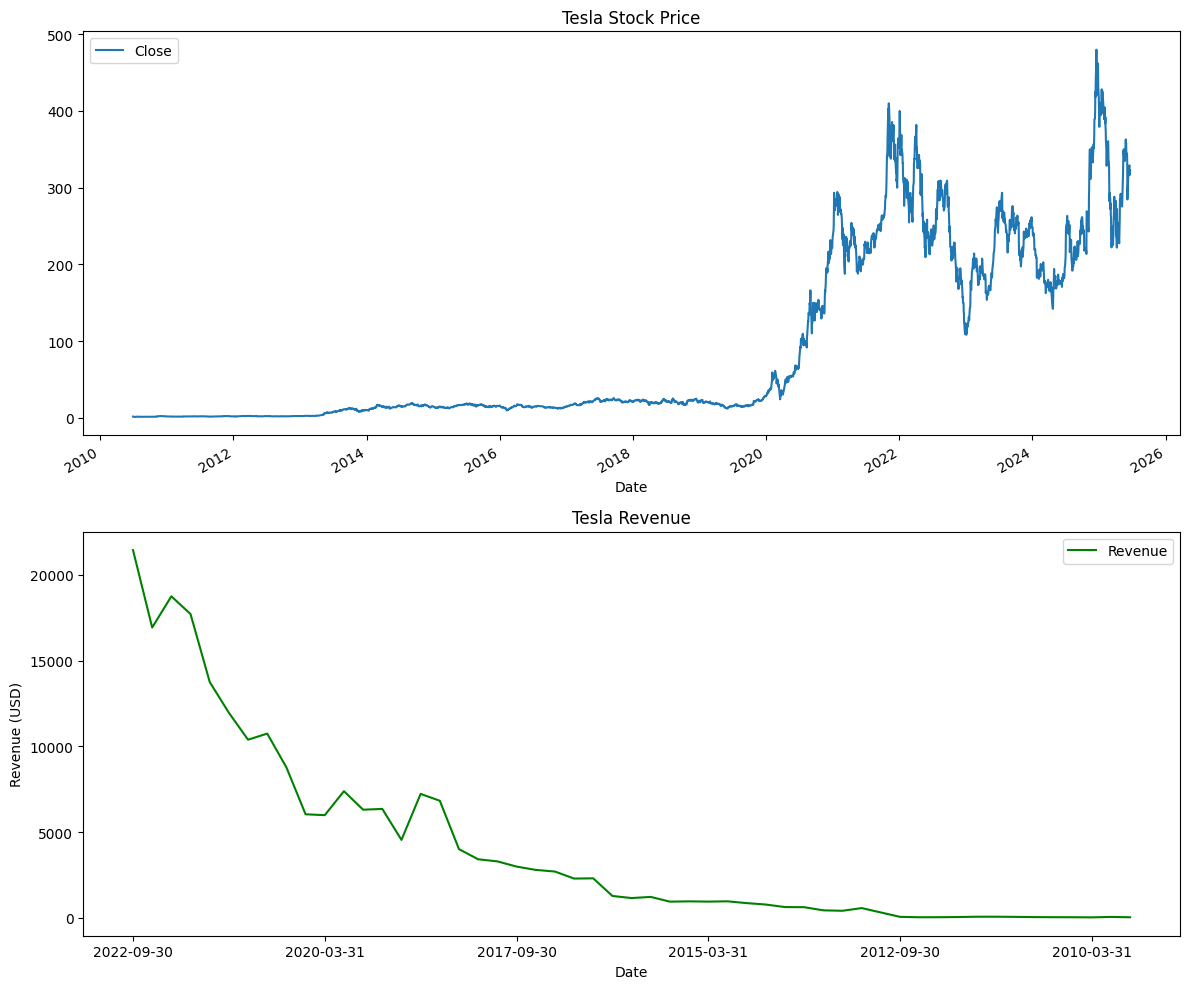

In [ ]:
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
tesla_data.plot(x="Date", y="Close", ax=ax1, title="Tesla Stock Price")
tesla_revenue.plot(x="Date", y="Revenue", ax=ax2, title="Tesla Revenue", color='green')
ax2.set_ylabel("Revenue (USD)")

plt.tight_layout()
plt.show()

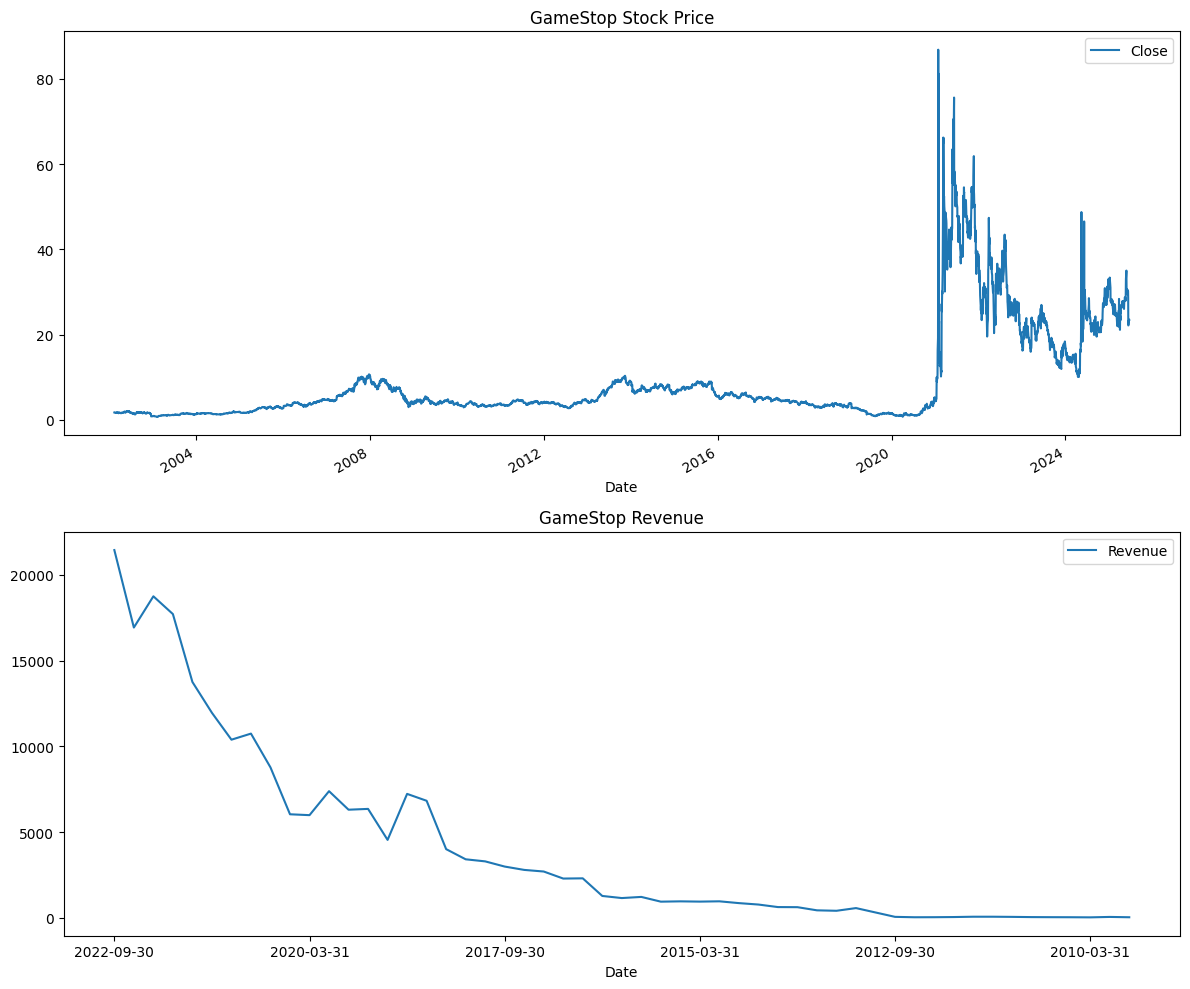

In [10]:
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
gamestop_data.plot(x="Date", y="Close", ax=ax1, title="GameStop Stock Price")
gamestop_revenue.plot(x="Date", y="Revenue", ax=ax2, title="GameStop Revenue")

plt.tight_layout()
plt.show()